In [ ]:
!pip install roboflow
!pip install ultralytics

In [ ]:
import os
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import ultralytics
from IPython.display import display,Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
from ultralytics import YOLO

In [ ]:

from roboflow import Roboflow
rf = Roboflow(api_key="MY_API_KEY")
# project = rf.workspace("myworkspace-v6ba0").project("mydatafromlocal")


project = rf.workspace("myworkspace-v6ba0").project("alltheimages")
version = project.version(7)
# project = rf.workspace("myworkspace-v6ba0").project("mydatafromlocal")
# version = project.version(5)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.78, to fix: `pip install ultralytics==8.0.196`
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to AllTheImages-7 in yolov8:: 100%|██████████| 4216/4216 [00:00<00:00, 6286.51it/s]


Statistics for train:
Class 0: 331
Class 1: 328
Class 2: 350
Class 3: 347
Class 4: 316

Statistics for test:
Class 0: 42
Class 1: 41
Class 2: 45
Class 3: 43
Class 4: 40

Statistics for valid:
Class 0: 47
Class 1: 43
Class 2: 45
Class 3: 45
Class 4: 39



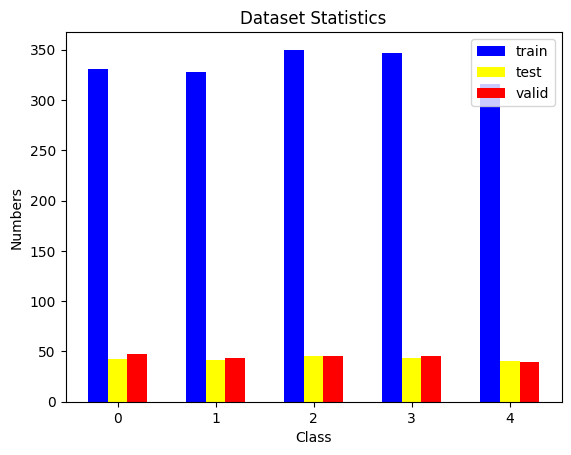

In [ ]:
import os
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt


dataPath = '/content/AllTheImages-7'
base_folder_path = dataPath  # تأكد من أن `dataPath` تم تعريفه مسبقًا

main_folders = ['train', 'test', 'valid']
counts_per_folder = {}

# احسب الإحصائيات
for folder in main_folders:
    label_folder_path = os.path.join(base_folder_path, folder, 'labels')

    files = [f for f in os.listdir(label_folder_path) if f.endswith('.txt')]

    numbers = []

    for file in files:
        with open(os.path.join(label_folder_path, file), 'r') as f:
            for line in f:
                first_number = line.split()[0]
                numbers.append(int(first_number))
                break

    counter = Counter(numbers)
    counts_per_folder[folder] = counter

# اطبع الإحصائيات كتابياً
for folder, counter in counts_per_folder.items():
    print(f"Statistics for {folder}:")
    for cls, count in sorted(counter.items()):
        print(f"Class {cls}: {count}")
    print()

# تحضير البيانات للتمثيل البياني
all_classes = sorted(set(key for counter in counts_per_folder.values() for key in counter.keys()))
bar_width = 0.2
indices = np.arange(len(all_classes))

colors = ['blue', 'yellow', 'red']

# رسم الرسوم البيانية
for i, folder in enumerate(main_folders):
    counter = counts_per_folder[folder]
    values = [counter.get(cls, 0) for cls in all_classes]
    plt.bar(indices + i * bar_width, values, color=colors[i], width=bar_width, label=folder)

plt.xlabel('Class')
plt.ylabel('Numbers')
plt.title('Dataset Statistics')
plt.xticks(indices + bar_width, all_classes)
plt.legend()
plt.show()


In [ ]:
model = YOLO('yolov8n.pt')
model.train(data=f'{dataPath}/data.yaml', epochs=150, imgsz=640, batch=16,conf=0.75)

100%|██████████| 6.25M/6.25M [00:00<00:00, 139MB/s]


Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/AllTheImages-7/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.75, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 23.4MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/AllTheImages-7/train/labels... 1672 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1672/1672 [00:00<00:00, 2193.76it/s]

train: New cache created: /content/AllTheImages-7/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/AllTheImages-7/valid/labels... 219 images, 0 backgrounds, 0 corrupt: 100%|██████████| 219/219 [00:00<00:00, 1292.91it/s]

val: New cache created: /content/AllTheImages-7/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.46G      1.561      3.439      1.929         12        640: 100%|██████████| 105/105 [00:36<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.17it/s]

                   all        219        226          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      2.26G      1.517      2.693      1.849          9        640: 100%|██████████| 105/105 [00:34<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]

                   all        219        226      0.816      0.142      0.484      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      2.25G      1.553      2.366      1.836         21        640: 100%|██████████| 105/105 [00:31<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.11it/s]


                   all        219        226       0.81      0.195      0.507      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      2.25G      1.553      2.193      1.829         22        640: 100%|██████████| 105/105 [00:30<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.38it/s]

                   all        219        226      0.685      0.123      0.396       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      2.25G      1.531       2.03      1.819         21        640: 100%|██████████| 105/105 [00:33<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.19it/s]

                   all        219        226        0.2     0.0174      0.109     0.0569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      2.26G      1.494      1.842      1.773         19        640: 100%|██████████| 105/105 [00:31<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.10it/s]

                   all        219        226      0.798      0.197       0.51      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      2.25G      1.461      1.726      1.742         18        640: 100%|██████████| 105/105 [00:31<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.47it/s]


                   all        219        226      0.731      0.163      0.444      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      2.25G      1.447      1.697       1.72         11        640: 100%|██████████| 105/105 [00:34<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.12it/s]

                   all        219        226      0.576      0.201      0.393      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      2.26G      1.428      1.656      1.712         16        640: 100%|██████████| 105/105 [00:31<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]

                   all        219        226      0.766      0.162      0.465      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      2.26G      1.417      1.575      1.703         22        640: 100%|██████████| 105/105 [00:32<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.25it/s]

                   all        219        226       0.98      0.266      0.626      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      2.25G      1.429      1.544      1.686         21        640: 100%|██████████| 105/105 [00:33<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]

                   all        219        226       0.77      0.228      0.503        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      2.26G      1.419      1.498      1.673         17        640: 100%|██████████| 105/105 [00:30<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.24it/s]

                   all        219        226      0.783      0.188      0.489      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      2.25G      1.378      1.428      1.636         18        640: 100%|██████████| 105/105 [00:30<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.07it/s]

                   all        219        226      0.746      0.225      0.485      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      2.25G      1.368        1.4      1.645         17        640: 100%|██████████| 105/105 [00:32<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]

                   all        219        226      0.909      0.361      0.636      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      2.25G      1.352      1.391      1.626         16        640: 100%|██████████| 105/105 [00:30<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.65it/s]

                   all        219        226      0.582      0.116       0.35      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      2.26G      1.351       1.38      1.621         17        640: 100%|██████████| 105/105 [00:30<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]

                   all        219        226      0.763      0.209      0.486      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      2.26G      1.333      1.355      1.591         17        640: 100%|██████████| 105/105 [00:32<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]

                   all        219        226      0.741      0.273      0.508      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      2.26G      1.351      1.319      1.621         14        640: 100%|██████████| 105/105 [00:30<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]

                   all        219        226      0.962      0.354      0.662      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      2.25G      1.324      1.278      1.591         19        640: 100%|██████████| 105/105 [00:30<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]

                   all        219        226      0.876      0.309        0.6      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      2.25G      1.322      1.281      1.581         14        640: 100%|██████████| 105/105 [00:34<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]

                   all        219        226      0.737      0.209      0.474      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      2.26G      1.307      1.272      1.575         15        640: 100%|██████████| 105/105 [00:29<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]

                   all        219        226      0.964      0.468      0.712      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      2.26G      1.316      1.262      1.578         13        640: 100%|██████████| 105/105 [00:29<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]

                   all        219        226      0.947      0.345      0.643      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      2.25G      1.289      1.205      1.554         18        640: 100%|██████████| 105/105 [00:34<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.86it/s]

                   all        219        226        0.7       0.16      0.431      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      2.26G      1.276      1.169      1.554         14        640: 100%|██████████| 105/105 [00:31<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.50it/s]

                   all        219        226      0.744      0.239      0.492      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      2.26G      1.301      1.189      1.563         16        640: 100%|██████████| 105/105 [00:42<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        219        226      0.776      0.188      0.481      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      2.26G      1.254      1.157      1.535         14        640: 100%|██████████| 105/105 [00:29<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

                   all        219        226      0.763      0.402       0.58      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      2.25G      1.243       1.16      1.537         12        640: 100%|██████████| 105/105 [00:29<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.24it/s]

                   all        219        226      0.944      0.388      0.672        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      2.26G      1.277      1.162      1.538         24        640: 100%|██████████| 105/105 [00:34<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]

                   all        219        226      0.985      0.447      0.719       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      2.26G      1.251      1.121      1.531         19        640: 100%|██████████| 105/105 [00:32<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.98it/s]

                   all        219        226      0.792      0.235      0.515      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      2.26G      1.265       1.14      1.535         21        640: 100%|██████████| 105/105 [00:31<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.10it/s]

                   all        219        226      0.987      0.293       0.64      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      2.25G       1.24      1.094      1.513         18        640: 100%|██████████| 105/105 [00:34<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.08it/s]


                   all        219        226       0.94      0.516      0.732      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      2.26G       1.25      1.096      1.513         21        640: 100%|██████████| 105/105 [00:31<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.14it/s]

                   all        219        226      0.766      0.375      0.571      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      2.25G      1.222      1.089      1.503         15        640: 100%|██████████| 105/105 [00:31<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.06it/s]

                   all        219        226      0.729      0.407      0.568       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      2.25G      1.217      1.086      1.503         20        640: 100%|██████████| 105/105 [00:34<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]

                   all        219        226       0.99        0.4      0.697      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      2.25G      1.228      1.059      1.497         12        640: 100%|██████████| 105/105 [00:30<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]

                   all        219        226      0.979      0.378      0.679      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      2.25G      1.202      1.057      1.476         25        640: 100%|██████████| 105/105 [00:30<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]

                   all        219        226      0.953       0.53      0.749      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      2.25G      1.225      1.036      1.503         16        640: 100%|██████████| 105/105 [00:34<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]

                   all        219        226      0.771      0.418      0.595       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      2.26G      1.194      1.021      1.471         15        640: 100%|██████████| 105/105 [00:29<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

                   all        219        226      0.966      0.392      0.678      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      2.25G      1.194      1.056      1.484         15        640: 100%|██████████| 105/105 [00:29<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]

                   all        219        226      0.965      0.508       0.74      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      2.26G      1.189      1.046      1.485         15        640: 100%|██████████| 105/105 [00:34<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.17it/s]

                   all        219        226      0.972        0.3      0.637      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      2.26G      1.157      0.987      1.448         17        640: 100%|██████████| 105/105 [00:31<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.94it/s]

                   all        219        226      0.971      0.551      0.764      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      2.25G      1.169     0.9869       1.46         19        640: 100%|██████████| 105/105 [00:31<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]

                   all        219        226      0.983      0.462      0.721      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      2.25G       1.17     0.9897      1.447         14        640: 100%|██████████| 105/105 [00:31<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.11it/s]

                   all        219        226      0.978      0.374      0.677      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      2.25G      1.154     0.9581      1.446         22        640: 100%|██████████| 105/105 [00:30<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.20it/s]

                   all        219        226          1      0.217      0.608        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      2.25G      1.158     0.9908      1.432         16        640: 100%|██████████| 105/105 [00:33<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.85it/s]

                   all        219        226      0.979      0.559      0.769      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      2.25G      1.145      0.974       1.43         15        640: 100%|██████████| 105/105 [00:31<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.91it/s]

                   all        219        226      0.975      0.427      0.699      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      2.25G      1.141     0.9556      1.431         13        640: 100%|██████████| 105/105 [00:31<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.79it/s]

                   all        219        226      0.969      0.575      0.771      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      2.26G      1.131     0.9436      1.435         18        640: 100%|██████████| 105/105 [00:34<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.18it/s]

                   all        219        226      0.903      0.461      0.684      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      2.26G      1.118     0.9333       1.42         14        640: 100%|██████████| 105/105 [00:31<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.06it/s]

                   all        219        226      0.977      0.543       0.76      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      2.26G      1.141     0.9161      1.425         20        640: 100%|██████████| 105/105 [00:31<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.14it/s]

                   all        219        226      0.969       0.52      0.747      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      2.25G      1.135     0.9376      1.427         25        640: 100%|██████████| 105/105 [00:34<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.19it/s]

                   all        219        226      0.979      0.555      0.764      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      2.26G      1.139     0.9057       1.42          9        640: 100%|██████████| 105/105 [00:30<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.83it/s]

                   all        219        226      0.977      0.585      0.782      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      2.26G      1.123      0.883      1.411          8        640: 100%|██████████| 105/105 [00:31<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.90it/s]

                   all        219        226      0.995      0.592      0.793      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      2.26G      1.111      0.922      1.408         14        640: 100%|██████████| 105/105 [00:34<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.11it/s]

                   all        219        226       0.96       0.51      0.737      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      2.25G       1.08     0.8925      1.394         12        640: 100%|██████████| 105/105 [00:31<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.72it/s]

                   all        219        226      0.978      0.605       0.79      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      2.26G       1.09     0.8919      1.398         11        640: 100%|██████████| 105/105 [00:31<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.75it/s]

                   all        219        226      0.961      0.508      0.736      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      2.26G      1.095     0.8726      1.392         14        640: 100%|██████████| 105/105 [00:32<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.03it/s]

                   all        219        226      0.956      0.641      0.802      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      2.26G      1.105     0.8724      1.393         15        640: 100%|██████████| 105/105 [00:31<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]


                   all        219        226      0.975      0.459      0.717      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      2.25G      1.071       0.88       1.37         13        640: 100%|██████████| 105/105 [00:34<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]

                   all        219        226       0.96      0.537      0.749      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      2.26G      1.061     0.8746      1.378         15        640: 100%|██████████| 105/105 [00:30<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]

                   all        219        226      0.976      0.589      0.784      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      2.26G      1.068     0.8438      1.374         14        640: 100%|██████████| 105/105 [00:29<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]

                   all        219        226      0.982      0.485      0.733      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      2.26G       1.07     0.8443      1.359         17        640: 100%|██████████| 105/105 [00:35<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.85it/s]

                   all        219        226       0.98      0.618        0.8      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      2.25G      1.057     0.8375      1.367         18        640: 100%|██████████| 105/105 [00:31<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.96it/s]


                   all        219        226      0.982      0.485      0.733      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      2.26G      1.017     0.8331      1.345         14        640: 100%|██████████| 105/105 [00:32<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.11it/s]

                   all        219        226      0.985      0.614      0.799      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      2.26G      1.034     0.8363      1.341         10        640: 100%|██████████| 105/105 [00:34<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.77it/s]


                   all        219        226      0.975      0.495      0.734       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      2.26G      1.055     0.8093      1.356         16        640: 100%|██████████| 105/105 [00:31<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.11it/s]

                   all        219        226      0.981      0.611      0.796      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      2.25G      1.044      0.817      1.362         12        640: 100%|██████████| 105/105 [00:31<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.96it/s]

                   all        219        226      0.983      0.541      0.762      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      2.25G      1.016     0.8095      1.338         20        640: 100%|██████████| 105/105 [00:35<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.77it/s]

                   all        219        226      0.969      0.672       0.82      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      2.26G      1.003     0.7901      1.328         14        640: 100%|██████████| 105/105 [00:30<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.91it/s]


                   all        219        226       0.98      0.639      0.809      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      2.26G      1.031     0.8351      1.349         20        640: 100%|██████████| 105/105 [00:34<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.84it/s]

                   all        219        226      0.985      0.612      0.797      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      2.25G     0.9986     0.8012      1.335         17        640: 100%|██████████| 105/105 [00:31<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.96it/s]

                   all        219        226       0.97      0.686      0.825      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      2.25G      1.005     0.7721       1.33         16        640: 100%|██████████| 105/105 [00:31<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.88it/s]

                   all        219        226      0.961      0.657      0.808      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      2.26G      1.023     0.8059      1.346         19        640: 100%|██████████| 105/105 [00:33<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]

                   all        219        226      0.971      0.603      0.786       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      2.26G     0.9953     0.7743      1.325         21        640: 100%|██████████| 105/105 [00:30<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]

                   all        219        226      0.978      0.678      0.825      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      2.25G     0.9814     0.7627      1.313         16        640: 100%|██████████| 105/105 [00:30<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]

                   all        219        226      0.985      0.707      0.845      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      2.26G     0.9881     0.7781      1.321         17        640: 100%|██████████| 105/105 [00:34<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]

                   all        219        226      0.987      0.715       0.85       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      2.25G      0.984     0.7582      1.305         10        640: 100%|██████████| 105/105 [00:31<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]


                   all        219        226      0.982      0.576      0.779      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      2.26G     0.9937     0.7467      1.318         15        640: 100%|██████████| 105/105 [00:31<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.36it/s]

                   all        219        226      0.987      0.631       0.81      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      2.25G     0.9564     0.7423      1.297         18        640: 100%|██████████| 105/105 [00:32<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]

                   all        219        226      0.985      0.588      0.785       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      2.26G     0.9787     0.7642      1.306         13        640: 100%|██████████| 105/105 [00:30<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        219        226      0.984       0.62      0.802      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      2.26G      0.955     0.7635      1.291         14        640: 100%|██████████| 105/105 [00:30<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.71it/s]

                   all        219        226      0.979        0.7       0.84       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      2.26G      0.957     0.7526      1.294         16        640: 100%|██████████| 105/105 [00:34<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.06it/s]

                   all        219        226      0.985      0.661      0.824      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      2.25G     0.9706      0.728      1.307         16        640: 100%|██████████| 105/105 [00:32<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.92it/s]

                   all        219        226      0.977      0.664      0.823      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      2.26G     0.9525     0.7378      1.302         21        640: 100%|██████████| 105/105 [00:33<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.91it/s]

                   all        219        226      0.975      0.613      0.795      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      2.26G     0.9457      0.726      1.282         22        640: 100%|██████████| 105/105 [00:31<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.94it/s]


                   all        219        226      0.958       0.62      0.794      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      2.26G     0.9383     0.7265      1.284         15        640: 100%|██████████| 105/105 [00:31<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.69it/s]

                   all        219        226      0.988       0.75      0.868      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      2.25G     0.9161     0.6891      1.257         28        640: 100%|██████████| 105/105 [00:33<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]

                   all        219        226      0.978      0.741       0.86      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      2.26G     0.9383     0.7297      1.277         15        640: 100%|██████████| 105/105 [00:30<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]

                   all        219        226      0.978      0.709      0.844      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      2.26G     0.9375     0.6918      1.271         15        640: 100%|██████████| 105/105 [00:30<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]

                   all        219        226      0.986      0.739      0.862      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      2.26G     0.9165     0.7123      1.262         13        640: 100%|██████████| 105/105 [00:34<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.91it/s]

                   all        219        226      0.964      0.667      0.815      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      2.25G     0.9188       0.72      1.269         11        640: 100%|██████████| 105/105 [00:32<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.08it/s]


                   all        219        226      0.984      0.738      0.864      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      2.26G     0.9121      0.687      1.263         16        640: 100%|██████████| 105/105 [00:34<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.79it/s]

                   all        219        226      0.975      0.733      0.855      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      2.26G     0.9143     0.6912      1.251         18        640: 100%|██████████| 105/105 [00:31<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.76it/s]

                   all        219        226      0.974      0.788      0.883      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      2.26G     0.9103     0.6819      1.262         13        640: 100%|██████████| 105/105 [00:31<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.77it/s]

                   all        219        226      0.963      0.777      0.874      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      2.25G     0.8888     0.6796      1.255         18        640: 100%|██████████| 105/105 [00:34<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.83it/s]

                   all        219        226      0.987      0.757      0.872      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      2.26G     0.9049      0.674      1.261         21        640: 100%|██████████| 105/105 [00:31<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.73it/s]

                   all        219        226      0.973      0.739      0.855      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      2.26G     0.8973     0.6771      1.254         15        640: 100%|██████████| 105/105 [00:31<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]

                   all        219        226      0.989       0.79      0.886      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      2.26G     0.8755     0.6735       1.23         13        640: 100%|██████████| 105/105 [00:34<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        219        226      0.981       0.76      0.869      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      2.25G     0.8818     0.6618      1.241         11        640: 100%|██████████| 105/105 [00:30<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]

                   all        219        226      0.988       0.81      0.898       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      2.25G     0.8814     0.6651      1.239         13        640: 100%|██████████| 105/105 [00:34<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.70it/s]

                   all        219        226      0.956      0.738      0.849      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      2.26G     0.8756     0.6538      1.233         14        640: 100%|██████████| 105/105 [00:31<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.98it/s]

                   all        219        226       0.98       0.77      0.875      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      2.25G     0.8524     0.6429      1.218         16        640: 100%|██████████| 105/105 [00:31<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.90it/s]

                   all        219        226      0.989      0.791      0.888       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      2.25G     0.8895     0.6516       1.24         13        640: 100%|██████████| 105/105 [00:35<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.88it/s]


                   all        219        226      0.972      0.735      0.857      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      2.26G     0.8641     0.6515      1.231         18        640: 100%|██████████| 105/105 [00:31<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.80it/s]

                   all        219        226      0.981      0.783      0.883      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      2.26G     0.8666     0.6661      1.237         24        640: 100%|██████████| 105/105 [00:31<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.19it/s]

                   all        219        226       0.98      0.767      0.875      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      2.26G      0.837      0.623      1.209         16        640: 100%|██████████| 105/105 [00:32<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]

                   all        219        226      0.976      0.761      0.869      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      2.25G     0.8369     0.6351       1.22         16        640: 100%|██████████| 105/105 [00:31<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.73it/s]

                   all        219        226      0.984      0.779      0.881      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      2.25G     0.8477     0.6297      1.212         15        640: 100%|██████████| 105/105 [00:35<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]


                   all        219        226      0.989      0.766      0.877      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      2.26G     0.8526     0.6532      1.228         16        640: 100%|██████████| 105/105 [00:31<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]

                   all        219        226      0.982      0.755      0.869      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      2.26G     0.8415     0.6498      1.222         13        640: 100%|██████████| 105/105 [00:31<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.92it/s]

                   all        219        226      0.976      0.784      0.882      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      2.25G     0.8289     0.6239      1.202         16        640: 100%|██████████| 105/105 [00:34<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.79it/s]

                   all        219        226       0.99      0.812        0.9      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      2.26G     0.8494     0.6448      1.217         15        640: 100%|██████████| 105/105 [00:32<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]

                   all        219        226      0.985      0.786      0.887      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      2.26G     0.8205     0.6125      1.203         16        640: 100%|██████████| 105/105 [00:32<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        219        226      0.971       0.83      0.905      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      2.26G     0.8198     0.6199      1.198         15        640: 100%|██████████| 105/105 [00:30<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]

                   all        219        226      0.979      0.835      0.907      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      2.25G     0.8096     0.5889      1.193         20        640: 100%|██████████| 105/105 [00:29<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]

                   all        219        226       0.99      0.833       0.91      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      2.26G     0.8045     0.6057      1.189         17        640: 100%|██████████| 105/105 [00:34<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.52it/s]


                   all        219        226      0.995      0.854      0.923        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      2.26G     0.7954     0.6019      1.179         18        640: 100%|██████████| 105/105 [00:31<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]

                   all        219        226       0.99      0.823      0.906      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      2.25G     0.7988     0.6142       1.19         17        640: 100%|██████████| 105/105 [00:32<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.96it/s]

                   all        219        226      0.981      0.805      0.894      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      2.25G     0.8199     0.6061      1.198         14        640: 100%|██████████| 105/105 [00:34<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.74it/s]


                   all        219        226      0.985      0.827      0.908      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      2.26G     0.8094     0.5825      1.195         14        640: 100%|██████████| 105/105 [00:32<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.30it/s]

                   all        219        226       0.99      0.841      0.915      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      2.26G     0.7904      0.587      1.179         17        640: 100%|██████████| 105/105 [00:34<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.76it/s]


                   all        219        226      0.983      0.794      0.888      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      2.26G     0.7805     0.5806      1.174         19        640: 100%|██████████| 105/105 [00:32<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.97it/s]

                   all        219        226       0.99      0.849      0.918      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      2.25G     0.7893     0.5823      1.175         22        640: 100%|██████████| 105/105 [00:32<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.73it/s]

                   all        219        226      0.969      0.824        0.9      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      2.25G       0.79     0.5911      1.189         16        640: 100%|██████████| 105/105 [00:34<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.85it/s]

                   all        219        226      0.985      0.829      0.908      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      2.25G     0.7863     0.5768      1.175         22        640: 100%|██████████| 105/105 [00:31<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]

                   all        219        226      0.986      0.831      0.909      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      2.25G     0.7866     0.5859      1.182         18        640: 100%|██████████| 105/105 [00:34<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.90it/s]

                   all        219        226      0.984       0.83      0.907       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      2.25G     0.7638     0.5648       1.17         17        640: 100%|██████████| 105/105 [00:32<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.87it/s]

                   all        219        226       0.99      0.852      0.922      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      2.25G      0.766     0.5875      1.164         19        640: 100%|██████████| 105/105 [00:32<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.90it/s]

                   all        219        226      0.954      0.831        0.9      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      2.25G     0.7613     0.5742      1.163         19        640: 100%|██████████| 105/105 [00:35<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]

                   all        219        226      0.981      0.826      0.903      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      2.26G     0.7509     0.5716      1.149         21        640: 100%|██████████| 105/105 [00:30<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]

                   all        219        226      0.979      0.817      0.898      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      2.25G     0.7512     0.5751      1.161         13        640: 100%|██████████| 105/105 [00:35<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.78it/s]

                   all        219        226      0.963       0.83      0.905       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      2.25G     0.7485      0.562      1.151         17        640: 100%|██████████| 105/105 [00:31<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]

                   all        219        226      0.976      0.826      0.902      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      2.26G     0.7474     0.5451      1.151         19        640: 100%|██████████| 105/105 [00:32<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.67it/s]

                   all        219        226      0.983      0.835      0.909      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      2.26G     0.7376     0.5396      1.146         13        640: 100%|██████████| 105/105 [00:34<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.74it/s]

                   all        219        226       0.98      0.843      0.915      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      2.25G     0.7466     0.5499      1.152         20        640: 100%|██████████| 105/105 [00:32<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.57it/s]

                   all        219        226      0.963      0.842      0.909      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      2.26G     0.7364     0.5432       1.15         18        640: 100%|██████████| 105/105 [00:34<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.72it/s]

                   all        219        226      0.985      0.836      0.911      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      2.25G     0.7244     0.5444       1.14         18        640: 100%|██████████| 105/105 [00:31<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.62it/s]

                   all        219        226       0.99      0.841      0.915      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      2.25G     0.7383      0.563      1.146         17        640: 100%|██████████| 105/105 [00:31<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]

                   all        219        226      0.986      0.857      0.924      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      2.25G     0.7336     0.5582      1.148         18        640: 100%|██████████| 105/105 [00:36<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.74it/s]

                   all        219        226      0.978      0.835      0.911      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      2.25G     0.7509     0.5527      1.148         19        640: 100%|██████████| 105/105 [00:32<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.81it/s]

                   all        219        226      0.973      0.847      0.915      0.604


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      2.39G     0.6929     0.3838      1.129          9        640: 100%|██████████| 105/105 [00:37<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.98it/s]


                   all        219        226       0.98      0.831      0.907      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      2.26G     0.6556     0.3536      1.103          8        640: 100%|██████████| 105/105 [00:32<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]

                   all        219        226      0.974      0.827      0.901      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      2.25G     0.6461     0.3508      1.098          8        640: 100%|██████████| 105/105 [00:31<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]

                   all        219        226      0.975      0.846       0.91      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      2.26G     0.6475      0.345      1.077          8        640: 100%|██████████| 105/105 [00:34<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.93it/s]

                   all        219        226      0.971      0.851      0.913       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      2.26G     0.6362     0.3438       1.08          8        640: 100%|██████████| 105/105 [00:31<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.70it/s]

                   all        219        226      0.971      0.839      0.906      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      2.26G     0.6378     0.3417      1.091          8        640: 100%|██████████| 105/105 [00:34<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.69it/s]

                   all        219        226      0.971      0.839      0.905      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      2.25G     0.6219     0.3359      1.075          8        640: 100%|██████████| 105/105 [00:30<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.82it/s]

                   all        219        226      0.971       0.85       0.91      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      2.26G     0.6072     0.3345      1.063          9        640: 100%|██████████| 105/105 [00:31<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.70it/s]

                   all        219        226      0.965      0.868      0.918      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      2.26G     0.6158      0.333      1.079          8        640: 100%|██████████| 105/105 [00:34<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.73it/s]

                   all        219        226      0.965      0.868      0.917      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      2.26G     0.6122     0.3287      1.063          9        640: 100%|██████████| 105/105 [00:31<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.01it/s]

                   all        219        226      0.965      0.863      0.915      0.604



150 epochs completed in 1.478 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]


                   all        219        226      0.986      0.857      0.924      0.614
              cataract         47         47      0.978      0.957      0.978      0.773
        conjunctivitis         43         46          1       0.87      0.935      0.624
                normal         45         47      0.951       0.83      0.892      0.504
             pterygium         45         47          1      0.936      0.968      0.679
                  stay         39         39          1      0.692      0.846      0.492
Speed: 0.4ms preprocess, 2.9ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79111e6bc3a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

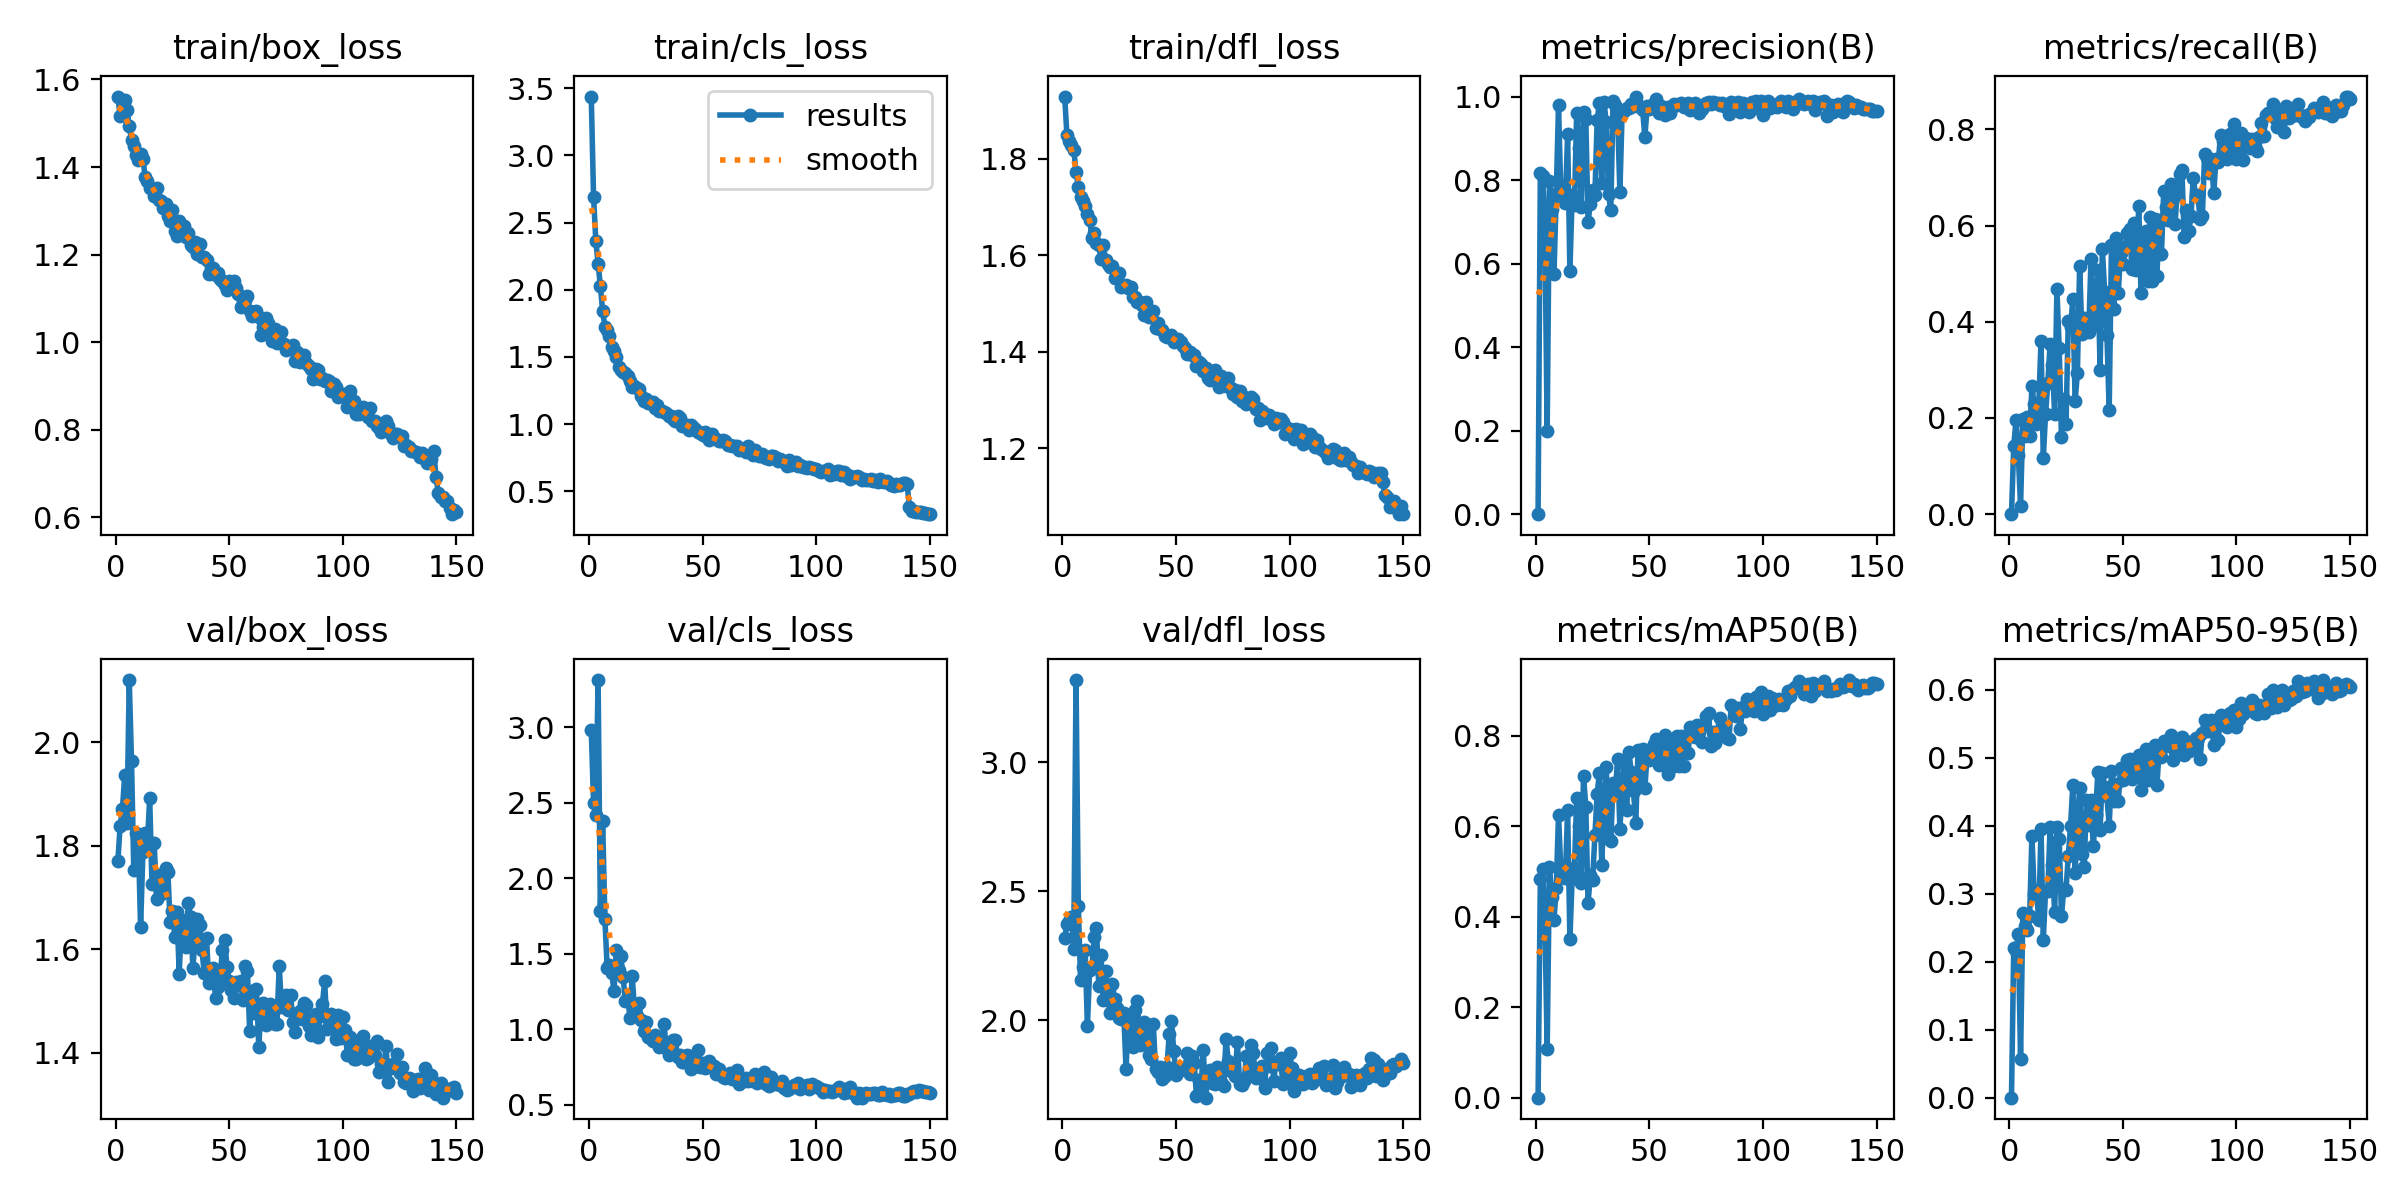

In [ ]:
Image(filename='/content/runs/detect/train/results.png',width=600)

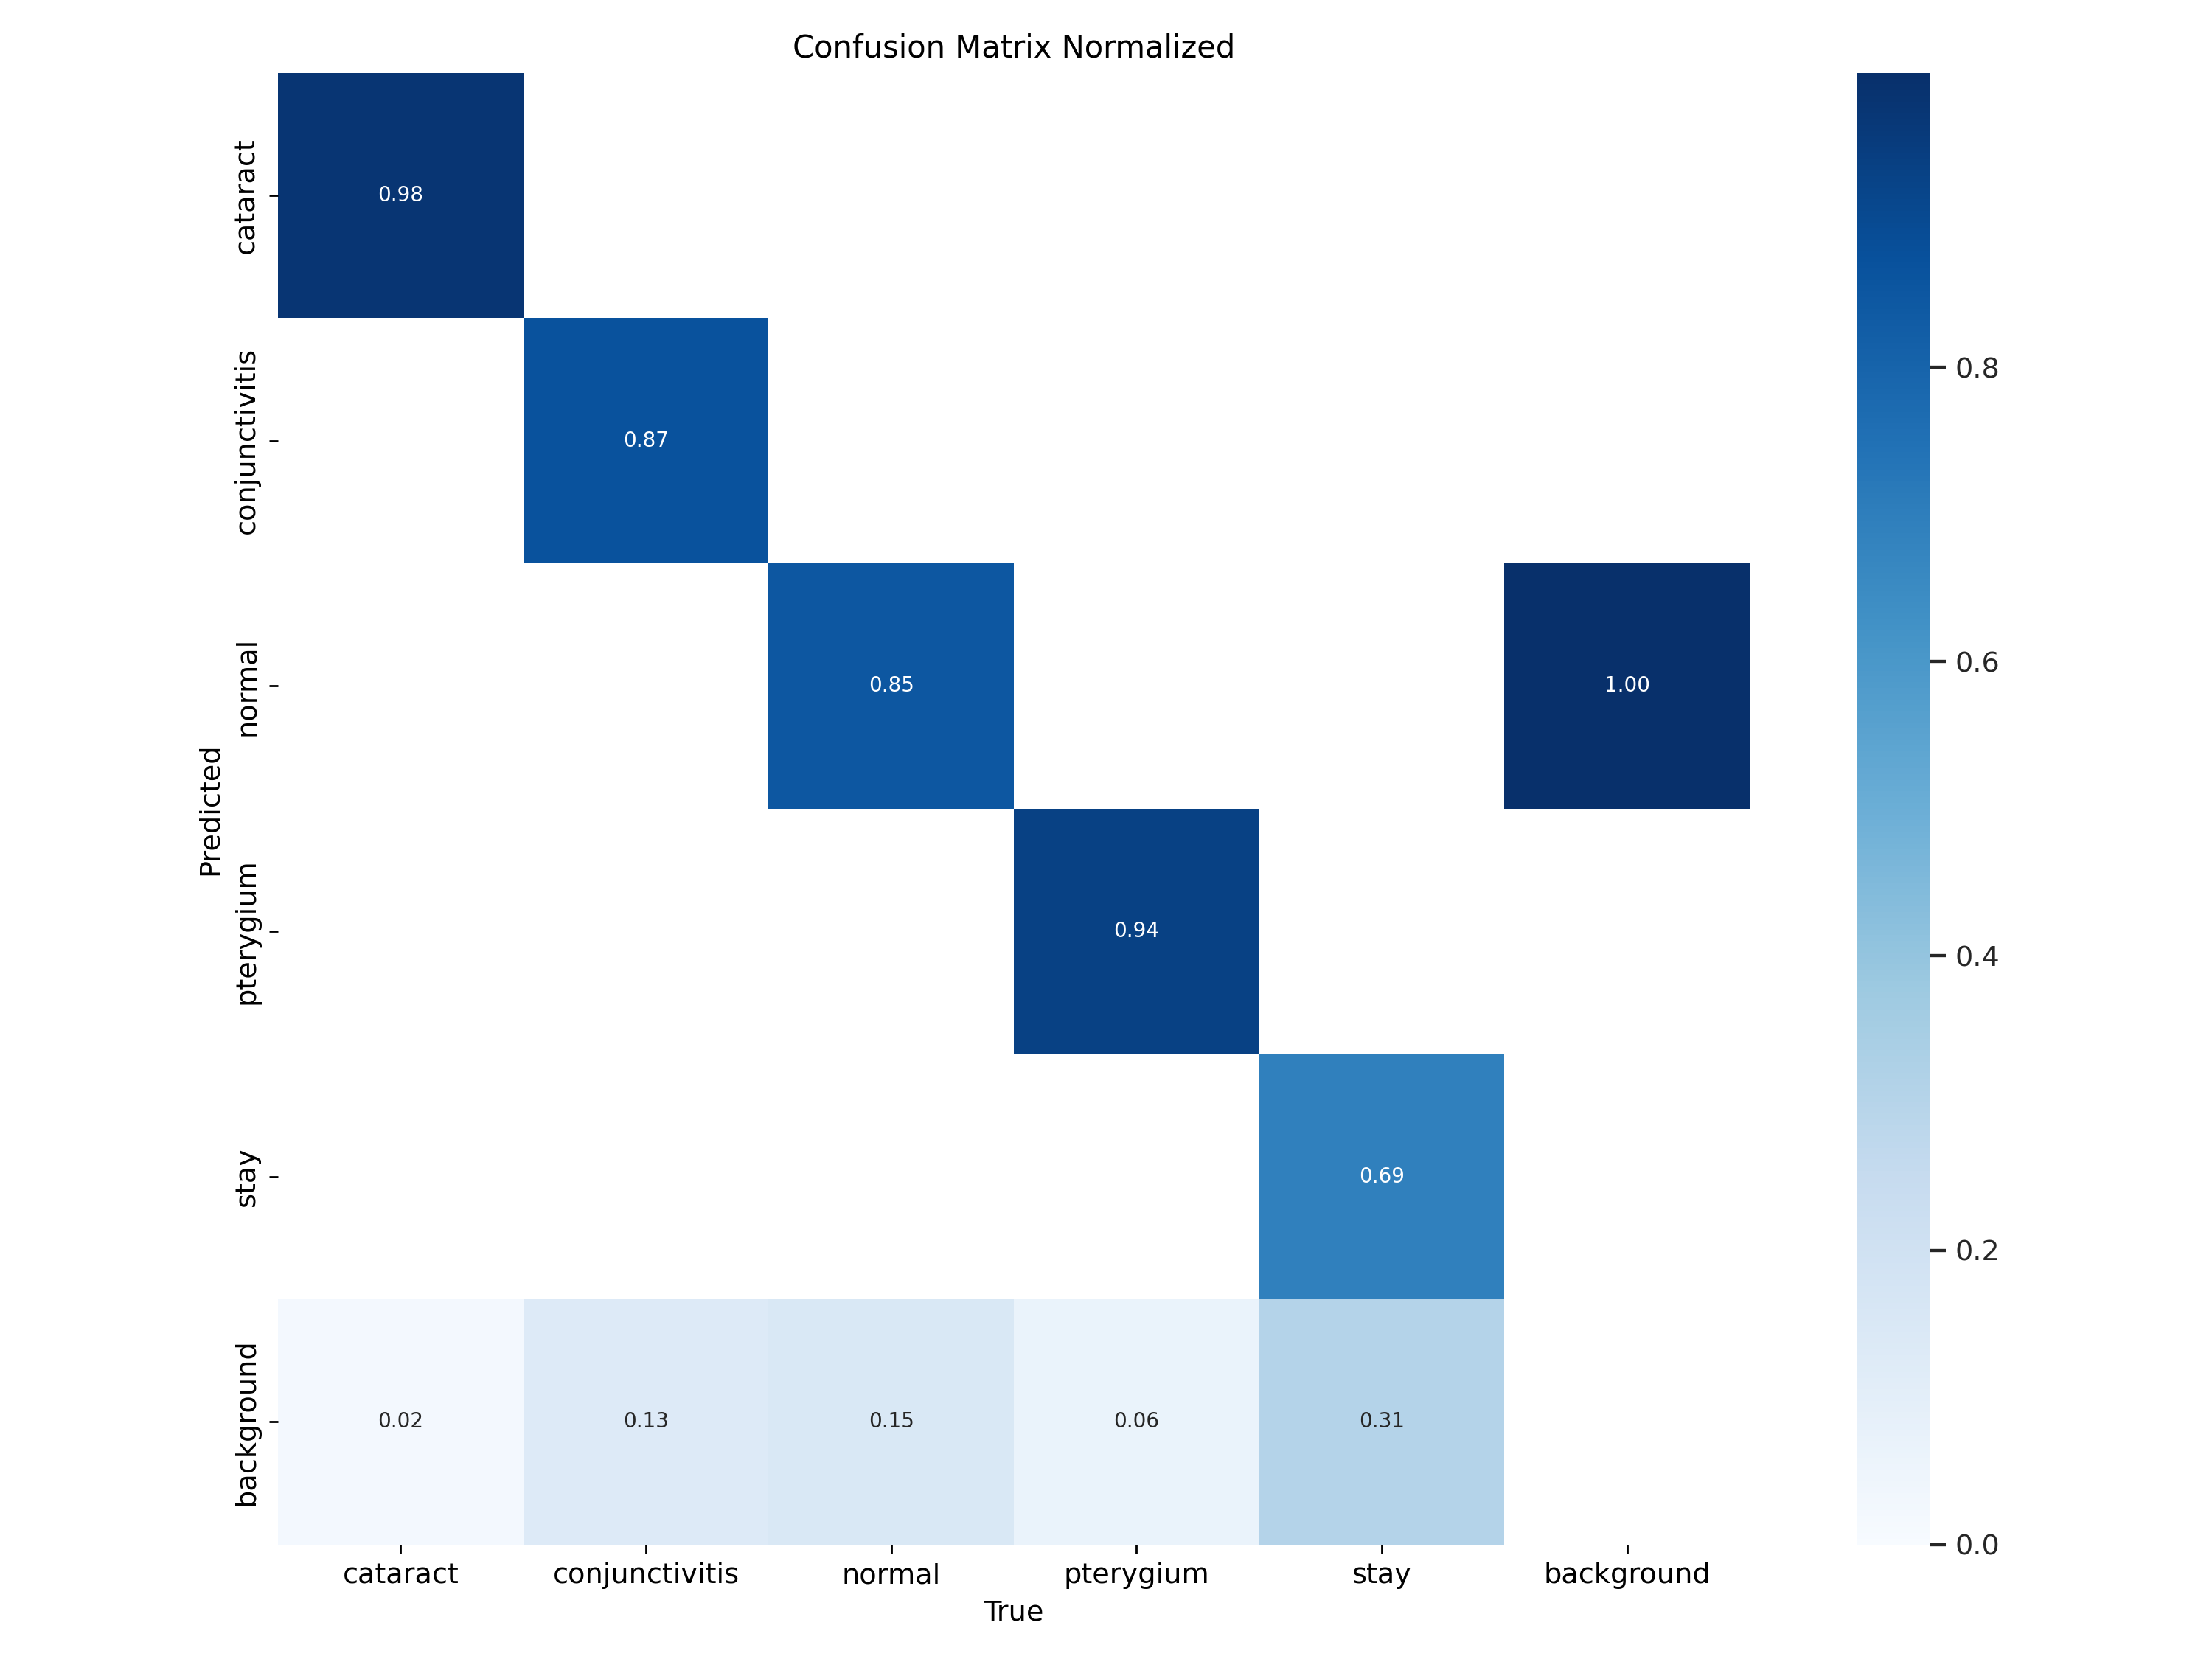

In [ ]:
Image(filename='/content/runs/detect/train/confusion_matrix_normalized.png',width=600)

In [ ]:
model=YOLO('/content/runs/detect/train/weights/best.pt')

In [ ]:
def ODImage(image) :
  yolo_outputs = model.predict(image)
  output = yolo_outputs[0]
  box = output.boxes
  names = output.names
  for j in range(len(box)):
    labels = names[box.cls[j].item()]
    coordinates = box.xyxy[j].tolist()
    confidence = np.round(box.conf[j].item(), 2)
    print(f'Object {j + 1} is: {labels}')
    print(f'Coordinates are: {coordinates}')
    print(f'Confidence is: {confidence}')
    print('-------')
  NewImage = output.plot()[:, :, ::-1]
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.imshow(cv2.cvtColor(cv2.imread(image, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB))
  plt.title('Original Image')
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(NewImage)
  plt.axis('off')
  plt.title('OD Image')
  plt.show()
  print(box)

In [ ]:
Path = '/content/drive/MyDrive/eyeCare/datajune6/pterygium'
try:
  ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
Path = '/content/drive/MyDrive/eyeCare/datajune6/Normaleyes'
try:
  ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
Path = '/content/drive/MyDrive/eyeCare/datajune6/cataract'
try:
  ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
Path = '/content/AllTheImages-4/test/images'
try:
  ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
def ODImageFolder2(folder_path):
    image_info_list = []
    images = os.listdir(folder_path)

    for image_file in images:
        image_path = os.path.join(folder_path, image_file)
        yolo_outputs = model.predict(image_path)
        output = yolo_outputs[0]
        box = output.boxes
        names = output.names
        objects = []

        for j in range(len(box)):
            label = names[box.cls[j].item()]
            coordinates = box.xyxy[j].tolist()
            confidence = np.round(box.conf[j].item(), 2)
            objects.append({
                "label": label,
                "coordinates": coordinates,
                "confidence": confidence
            })

        image_info_list.append({
            "img": image_path,
            "objects": objects
        })

    return image_info_list



In [ ]:
def displayDetectedImagesGrid(image_info_list, start_index=0, num_rows=2, num_columns=5):
    num_images = num_rows * num_columns

    # Create a figure with the specified number of subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 3 * num_rows))

    # Flatten axes for easy iteration
    axes = axes.flatten()

    for i in range(num_images):
        img_index = start_index + i
        if img_index >= len(image_info_list):
            break

        info = image_info_list[img_index]
        image_path = info['img']
        objects = info['objects']

        img = cv2.cvtColor(cv2.imread(image_path, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

        # Display the image
        axes[i].imshow(img)

        ll = ''
        # Draw bounding boxes and labels
        for obj in objects:
            label = obj['label']
            ll = ll + label + ','
            coordinates = obj['coordinates']
            confidence = obj['confidence']

            x1, y1, x2, y2 = map(int, coordinates)
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            axes[i].text(x1, y1 - 10, f"{label} ({confidence})", color='red', fontsize=8, backgroundcolor='white')


        axes[i].set_title(f"objects: {ll}", fontsize=10)
        axes[i].axis('off')
        axes[i].imshow(img)

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage


In [ ]:
# Example usage
Path = '/content/AllTheImages-7/test/images'
try:
    image_info_list = ODImageFolder2(Path)
    print(image_info_list)
except Exception as e:
    print(f"An error occurred: {e}")


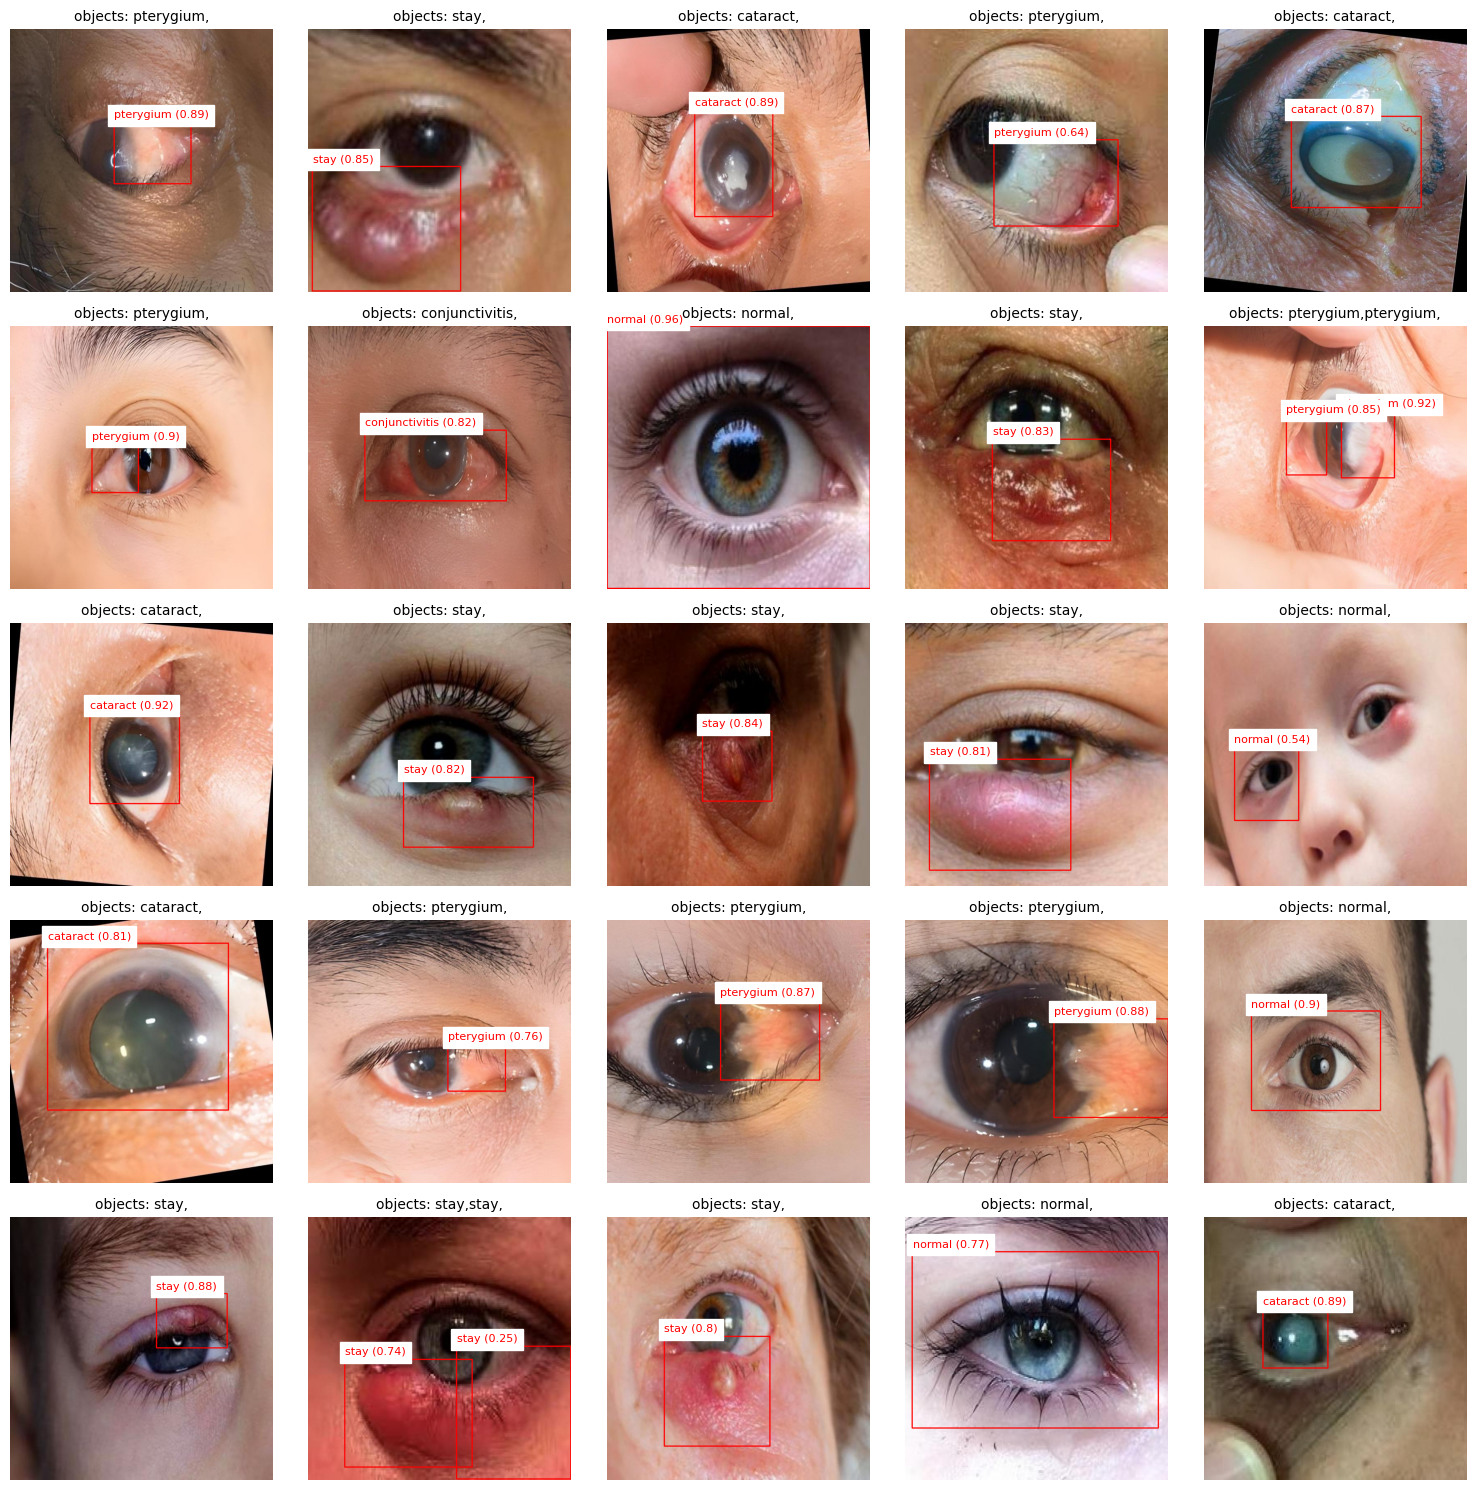

In [ ]:

# Example usage
displayDetectedImagesGrid(image_info_list, start_index=0, num_rows=5, num_columns=5)
